In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('asteroid_data.csv')

In [3]:
df.head()

,name,approach_date,diameter_km,velocity_kmph,distance_km,is_hazardous
0,478784 (2012 UV136),2025-06-02,0.045,49511.25,50442662.03,False
1,(2015 RQ35),2025-06-02,0.082,11950.19,70450034.10,False
2,(2016 EL27),2025-06-02,0.036,25733.18,54278219.47,False
3,(2019 VF1),2025-06-02,0.149,80619.27,23118633.90,False
4,(2020 XS5),2025-06-02,0.027,40999.06,36304847.90,False


Define a label:

If distance < 1 million km and size > 140m → "High Risk"

Else if either condition met → "Medium Risk"

Else → "Low Risk"

👉 This creates a supervised dataset for ML.

In [4]:
max(df['diameter_km'])

3.855

In [5]:
conditions = [
    (df['distance_km'] < 1000000) & (df['diameter_km'] > 1.40),
    (df['distance_km'] < 1000000) | (df['diameter_km'] > 1.40)
]

# Define the choices
choices = ['High Risk', 'Medium Risk']

# Create the 'risk' column
df['risk'] = np.select(conditions, choices, default='Low Risk')


In [6]:
df

,name,approach_date,diameter_km,velocity_kmph,distance_km,is_hazardous,risk
0,478784 (2012 UV136),2025-06-02,0.045,49511.25,50442662.03,False,Low Risk
1,(2015 RQ35),2025-06-02,0.082,11950.19,70450034.10,False,Low Risk
2,(2016 EL27),2025-06-02,0.036,25733.18,54278219.47,False,Low Risk
3,(2019 VF1),2025-06-02,0.149,80619.27,23118633.90,False,Low Risk
4,(2020 XS5),2025-06-02,0.027,40999.06,36304847.90,False,Low Risk
...,...,...,...,...,...,...,...
1590,(2024 FA),2025-03-09,0.187,86494.30,27568592.00,False,Low Risk
1591,(2025 DE4),2025-03-09,0.063,48490.37,7719477.82,False,Low Risk
1592,(2025 DX4),2025-03-09,0.042,8333.79,14738665.39,False,Low Risk
1593,(2025 DZ6),2025-03-09,0.059,35613.66,4999225.93,False,Low Risk


In [7]:
# Define the mapping
risk_mapping = {
    'Low Risk': 0,
    'Medium Risk': 1,
    'High Risk': 2
}

# Apply the mapping
df['risk_numeric'] = df['risk'].map(risk_mapping)

In [8]:
df

,name,approach_date,diameter_km,velocity_kmph,distance_km,is_hazardous,risk,risk_numeric
0,478784 (2012 UV136),2025-06-02,0.045,49511.25,50442662.03,False,Low Risk,0
1,(2015 RQ35),2025-06-02,0.082,11950.19,70450034.10,False,Low Risk,0
2,(2016 EL27),2025-06-02,0.036,25733.18,54278219.47,False,Low Risk,0
3,(2019 VF1),2025-06-02,0.149,80619.27,23118633.90,False,Low Risk,0
4,(2020 XS5),2025-06-02,0.027,40999.06,36304847.90,False,Low Risk,0
...,...,...,...,...,...,...,...,...
1590,(2024 FA),2025-03-09,0.187,86494.30,27568592.00,False,Low Risk,0
1591,(2025 DE4),2025-03-09,0.063,48490.37,7719477.82,False,Low Risk,0
1592,(2025 DX4),2025-03-09,0.042,8333.79,14738665.39,False,Low Risk,0
1593,(2025 DZ6),2025-03-09,0.059,35613.66,4999225.93,False,Low Risk,0


In [9]:
# prompt: Print all the values possible in is_hazardous as a set

print(set(df['is_hazardous']))

{False, True}


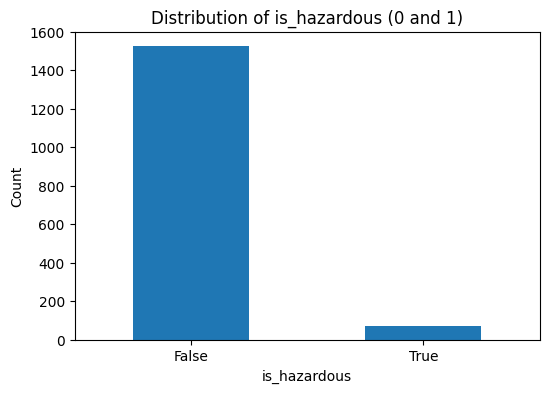

In [10]:
# prompt: plot the distribution of 0 and 1 in is_hazardous

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
df['is_hazardous'].value_counts().plot(kind='bar')
plt.title('Distribution of is_hazardous (0 and 1)')
plt.xlabel('is_hazardous')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# EDA

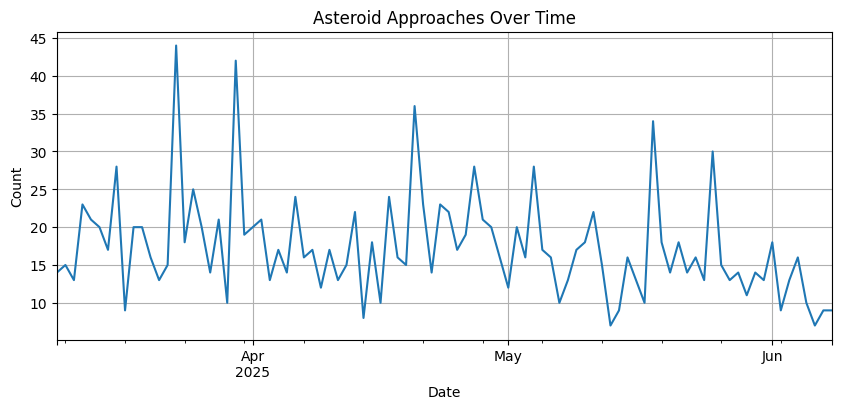

In [11]:
df['approach_date'] = pd.to_datetime(df['approach_date'])
daily_counts = df.groupby('approach_date').size()

import matplotlib.pyplot as plt
daily_counts.plot(title='Asteroid Approaches Over Time', figsize=(10, 4))
plt.xlabel("Date")
plt.ylabel("Count")
plt.grid(True)
plt.show()


Date is meangingless in the scale of time in space

In [12]:
# prompt: replace 'False' with 0 and 'True' with 1 in is_hazardous

df['is_hazardous'] = df['is_hazardous'].replace({False: 0, True: 1})
df.head()

C:\Users\gautu\AppData\Local\Temp\ipykernel_25564\2303503372.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_hazardous'] = df['is_hazardous'].replace({False: 0, True: 1})


,name,approach_date,diameter_km,velocity_kmph,distance_km,is_hazardous,risk,risk_numeric
0,478784 (2012 UV136),2025-06-02,0.045,49511.25,50442662.03,0,Low Risk,0
1,(2015 RQ35),2025-06-02,0.082,11950.19,70450034.10,0,Low Risk,0
2,(2016 EL27),2025-06-02,0.036,25733.18,54278219.47,0,Low Risk,0
3,(2019 VF1),2025-06-02,0.149,80619.27,23118633.90,0,Low Risk,0
4,(2020 XS5),2025-06-02,0.027,40999.06,36304847.90,0,Low Risk,0


In [13]:
# prompt: Using dataframe df: Drop the column risk and rename risk_numeric to risk

# Drop the column 'risk'
df = df.drop('risk', axis=1)

# Rename the column 'risk_numeric' to 'risk'
df = df.rename(columns={'risk_numeric': 'risk'})

In [14]:
new_df = df[['diameter_km', 'velocity_kmph', 'distance_km','is_hazardous','risk']]

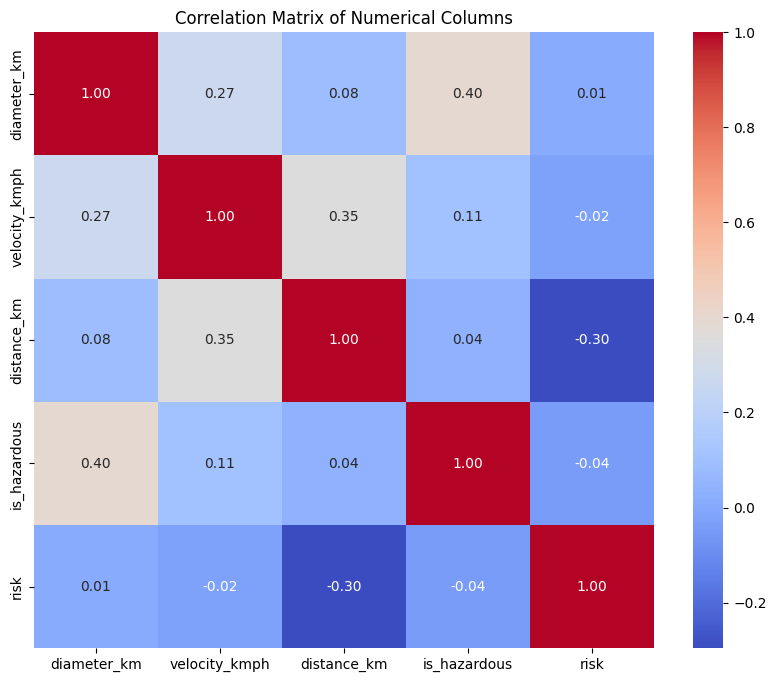

In [15]:
# prompt: Create correlation matrix for all columns with seaborn

import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = new_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


Seems that distance_km has the highest correlation

#### 1. **`diameter_km` vs `is_hazardous` → 0.40**

* **Moderate positive correlation**
* 🚀 Bigger asteroids are *more likely* to be classified as hazardous.
* This makes sense scientifically — larger objects cause more damage if they hit.

---

#### 2. **`velocity_kmph` vs `distance_km` → 0.35**

* Slight positive correlation
* 🛰️ Faster asteroids tend to pass at a slightly greater distance. Possibly a detection bias or physical trend, but weak.

---

#### 3. **`distance_km` vs `risk` → -0.30**

* ❗ Weak-to-moderate **negative** correlation
* As expected: **closer asteroids = higher risk**

---

#### 4. **`diameter_km`, `velocity_kmph`, and `distance_km` vs `risk` → all \~0 to -0.30**

* Low correlations, but `distance_km` has the strongest impact on `risk`
* Suggests that `risk` may be more dependent on a **combination** of features rather than any one factor

---

#### 5. **`is_hazardous` vs `risk` → -0.04**

* Basically no correlation



Not much information available to clarify the logic for using is_hazardous

In [16]:
new_df

,diameter_km,velocity_kmph,distance_km,is_hazardous,risk
0,0.045,49511.25,50442662.03,0,0
1,0.082,11950.19,70450034.10,0,0
2,0.036,25733.18,54278219.47,0,0
3,0.149,80619.27,23118633.90,0,0
4,0.027,40999.06,36304847.90,0,0
...,...,...,...,...,...
1590,0.187,86494.30,27568592.00,0,0
1591,0.063,48490.37,7719477.82,0,0
1592,0.042,8333.79,14738665.39,0,0
1593,0.059,35613.66,4999225.93,0,0


In [17]:
# prompt: Replace risk with a new parameter risk_score. risk_score is the product of diameter and square of velocity, divided by the distance_km

new_df['risk_score'] = (new_df['diameter_km'] * (new_df['velocity_kmph']**2)) / new_df['distance_km']
new_df = new_df.drop('risk', axis=1)
# df = df.drop('risk_numeric', axis=1)
new_df.head()

C:\Users\gautu\AppData\Local\Temp\ipykernel_25564\3933996771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['risk_score'] = (new_df['diameter_km'] * (new_df['velocity_kmph']**2)) / new_df['distance_km']


,diameter_km,velocity_kmph,distance_km,is_hazardous,risk_score
0,0.045,49511.25,50442662.03,0,2.186867
1,0.082,11950.19,70450034.10,0,0.166220
2,0.036,25733.18,54278219.47,0,0.439202
3,0.149,80619.27,23118633.90,0,41.889177
4,0.027,40999.06,36304847.90,0,1.250106


In [18]:
# prompt: normalise risk_score

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
new_df['risk_score'] = scaler.fit_transform(new_df[['risk_score']])

new_df.head()

,diameter_km,velocity_kmph,distance_km,is_hazardous,risk_score
0,0.045,49511.25,50442662.03,0,0.000435
1,0.082,11950.19,70450034.10,0,0.000031
2,0.036,25733.18,54278219.47,0,0.000085
3,0.149,80619.27,23118633.90,0,0.008381
4,0.027,40999.06,36304847.90,0,0.000247


In [19]:
# prompt: Split the data into a 80:20 train test dataset. The target variable is is_hazardous

from sklearn.model_selection import train_test_split

X = new_df.drop('is_hazardous', axis=1)  # Features
y = new_df['is_hazardous']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Testing set shape (X_test, y_test): {X_test.shape}, {y_test.shape}")

Training set shape (X_train, y_train): (1276, 4), (1276,)
Testing set shape (X_test, y_test): (319, 4), (319,)


In [20]:
# prompt: Scale all the columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale all columns in new_df except 'is_hazardous'
# Assuming 'is_hazardous' is the target and should not be scaled with features
columns_to_scale = new_df.columns.difference(['is_hazardous'])
new_df[columns_to_scale] = scaler.fit_transform(new_df[columns_to_scale])

new_df.head()

,diameter_km,velocity_kmph,distance_km,is_hazardous,risk_score
0,0.010903,0.243947,0.674447,0,0.000435
1,0.020509,0.042545,0.942074,0,0.000031
2,0.008567,0.116449,0.725753,0,0.000085
3,0.037902,0.410748,0.308950,0,0.008381
4,0.006231,0.198305,0.485334,0,0.000247


In [21]:
new_df

,diameter_km,velocity_kmph,distance_km,is_hazardous,risk_score
0,0.010903,0.243947,0.674447,0,0.000435
1,0.020509,0.042545,0.942074,0,0.000031
2,0.008567,0.116449,0.725753,0,0.000085
3,0.037902,0.410748,0.308950,0,0.008381
4,0.006231,0.198305,0.485334,0,0.000247
...,...,...,...,...,...
1590,0.047767,0.442250,0.368475,0,0.010154
1591,0.015576,0.238473,0.102965,0,0.003838
1592,0.010125,0.023154,0.196857,0,0.000037
1593,0.014538,0.169428,0.066578,0,0.002993


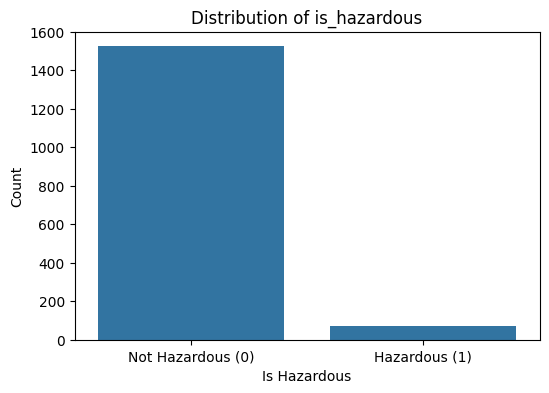

In [22]:
# prompt: Plot the distribution of is_hazardous

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.countplot(x='is_hazardous', data=df)
plt.title('Distribution of is_hazardous')
plt.xlabel('Is Hazardous')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Hazardous (0)', 'Hazardous (1)'])
plt.show()

Original training set shape: (1276, 4), (1276,)
Resampled training set shape: (2430, 4), (2430,)

Distribution of 'is_hazardous' in original training set:
is_hazardous
0    1215
1      61
Name: count, dtype: int64

Distribution of 'is_hazardous' in resampled training set:
is_hazardous
0    1215
1    1215
Name: count, dtype: int64


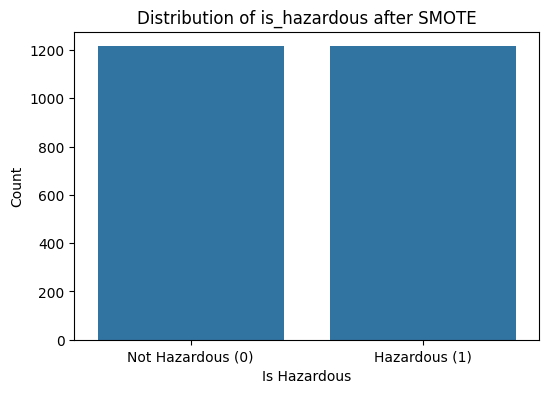

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Resample training data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Print shapes
print(f"Original training set shape: {X_train.shape}, {y_train.shape}")
print(f"Resampled training set shape: {X_resampled.shape}, {y_resampled.shape}")

# Check class distribution
print("\nDistribution of 'is_hazardous' in original training set:")
print(y_train.value_counts())

print("\nDistribution of 'is_hazardous' in resampled training set:")
print(pd.Series(y_resampled).value_counts())

# Visualize
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled)
plt.title('Distribution of is_hazardous after SMOTE')
plt.xlabel('Is Hazardous')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Hazardous (0)', 'Hazardous (1)'])
plt.show()


# Model training

In [24]:
# prompt: Create an SVM model to predict is_hazardous . Set verbose so that I can see what is happening.

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the SVM model
# We'll use a simple C-Support Vector Classification.
# `probability=True` is needed if you want probability estimates (though not strictly needed for prediction here).
# `verbose=True` will print output related to the optimization process.
svm_model = SVC(probability=True, verbose=True)

# Train the model
print("Training the SVM model...")
svm_model.fit(X_resampled, y_resampled)
print("Training complete.")


Training the SVM model...
[LibSVM]Training complete.


In [25]:

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("\nEvaluating the SVM model:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))



Evaluating the SVM model:
Confusion Matrix:
[[141 168]
 [  5   5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.46      0.62       309
           1       0.03      0.50      0.05        10

    accuracy                           0.46       319
   macro avg       0.50      0.48      0.34       319
weighted avg       0.94      0.46      0.60       319


Accuracy Score:
0.45768025078369906


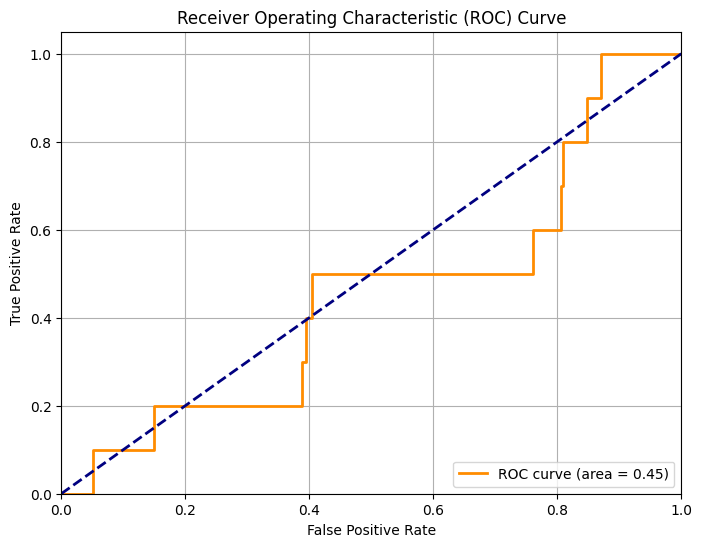

In [26]:
# prompt: Plot ROC curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get probability predictions for the positive class (is_hazardous = 1)
y_proba = svm_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
# prompt: Use gridsearch to find the best parameters

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [1, 10],
    'gamma': ['scale', 0.1],
    'kernel': ['rbf', 'linear']
}

# Initialize GridSearchCV
# cv=5 means 5-fold cross-validation
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)

# Fit the grid search to the resampled training data
print("Starting GridSearchCV...")
grid_search.fit(X_resampled, y_resampled)

# param_grid_linear = {'C': [1, 10]}
# grid_search_linear = GridSearchCV(LinearSVC(), param_grid_linear, cv=5, verbose=3)
# grid_search_linear.fit(X_resampled, y_resampled)

print("GridSearchCV complete.")

# Print the best parameters found
print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Print the best score found
print("\nBest cross-validation score:")
print(grid_search.best_score_)


Starting GridSearchCV...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ......C=1, gamma=scale, kernel=rbf;, score=0.560 total time=   0.2s
[CV 2/5] END ......C=1, gamma=scale, kernel=rbf;, score=0.626 total time=   0.2s
[CV 3/5] END ......C=1, gamma=scale, kernel=rbf;, score=0.593 total time=   0.2s
[CV 4/5] END ......C=1, gamma=scale, kernel=rbf;, score=0.584 total time=   0.2s
[CV 5/5] END ......C=1, gamma=scale, kernel=rbf;, score=0.595 total time=   0.1s


In [ ]:

# Get the best model from the grid search
best_svm_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_svm_model.predict(X_test)

# Evaluate the best model
print("\nEvaluating the Best SVM model found by GridSearchCV:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_best))

# Get probability predictions for the positive class (is_hazardous = 1) using the best model
y_proba_best = best_svm_model.predict_proba(X_test)[:, 1]

# Compute ROC curve for the best model
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_proba_best)

# Compute AUC for the best model
roc_auc_best = auc(fpr_best, tpr_best)

# Plot ROC curve for the best model
plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_best)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Best Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()